In [1]:
pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.4 MB 2.1 MB/s eta 0:00:01
   ----------------------------- ---------- 1.0/1.4 MB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [21]:
data = pd.read_csv('credit_card_clean.csv')

In [8]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,male,highschool,married,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,male,highschool,single,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,male,university,single,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,male,highschool,married,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [9]:
data.shape

(30000, 25)

In [10]:
data.dtypes

ID             int64
LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

In [11]:
data.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [28]:
data['EDUCATION'].value_counts()

EDUCATION
university    14030
grad          10585
highschool     4917
other           468
Name: count, dtype: int64

In [22]:
del data['ID']

In [23]:
le = LabelEncoder()

In [24]:
data['SEX'] = le.fit_transform(data['SEX']) # 0 -> Female, 1 -> Male

In [29]:
data['EDUCATION'] = le.fit_transform(data['EDUCATION'])

In [30]:
data['MARRIAGE'] = le.fit_transform(data['MARRIAGE'])

In [31]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,0,3,0,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,0,3,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,0,3,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,0,3,0,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,3,0,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,1,0,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,1,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,3,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,1,0,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [36]:
x = data.drop(labels='DEFAULT', axis=1)

In [38]:
y = data[['DEFAULT']]

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75)

In [52]:
RF_model = RandomForestClassifier()
AB_model = AdaBoostClassifier()
GB_model = GradientBoostingClassifier()
XGB_model = XGBClassifier()
LGB_model = LGBMClassifier()

In [53]:
%%time
RF_model.fit(x_train, y_train)

C:\Users\anbuu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


CPU times: total: 4.84 s
Wall time: 7.99 s


RandomForestClassifier()

In [54]:
%%time
AB_model.fit(x_train, y_train)

C:\Users\anbuu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anbuu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CPU times: total: 1.39 s
Wall time: 2.44 s


AdaBoostClassifier()

In [55]:
%%time
GB_model.fit(x_train, y_train)

C:\Users\anbuu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: total: 6.7 s
Wall time: 10.5 s


GradientBoostingClassifier()

In [56]:
%%time
XGB_model.fit(x_train, y_train)

CPU times: total: 1.7 s
Wall time: 307 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
%%time
LGB_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 4968, number of negative: 17532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3261
[LightGBM] [Info] Number of data points in the train set: 22500, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.220800 -> initscore=-1.261010
[LightGBM] [Info] Start training from score -1.261010


C:\Users\anbuu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anbuu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


CPU times: total: 719 ms
Wall time: 252 ms


LGBMClassifier()

In [58]:
RF_Feature = RF_model.feature_importances_

In [59]:
RF_Feature

array([0.05973596, 0.01203683, 0.01846155, 0.01233864, 0.06623328,
       0.09485111, 0.04475801, 0.0280127 , 0.02482934, 0.02391264,
       0.01788049, 0.05961255, 0.0553066 , 0.05211971, 0.05096932,
       0.04995592, 0.05004361, 0.05093672, 0.04750813, 0.04620518,
       0.04345907, 0.04416448, 0.04666815])

In [62]:
y_light = LGB_model.predict(x_test)
accuracy_score(y_test, y_light)

0.82

In [63]:
y_ext = XGB_model.predict(x_test)
accuracy_score(y_test, y_ext)

0.8129333333333333

In [64]:
RF_fea = RF_model.feature_importances_
AB_fea = AB_model.feature_importances_
GB_fea = GB_model.feature_importances_
XGB_fea = XGB_model.feature_importances_
LGB_fea = LGB_model.feature_importances_

In [66]:
feature_importance = pd.DataFrame({"Feature": x_train.columns, 
                                    "RF_fea": RF_fea,
                                    "AB_fea": AB_fea,
                                    "GB_fea": GB_fea,
                                    "XGB_fea": XGB_fea,
                                    "LGB_fea": LGB_fea
                                  })

In [67]:
feature_importance

,Feature,RF_fea,AB_fea,GB_fea,XGB_fea,LGB_fea
0,LIMIT_BAL,0.059736,0.06,0.026142,0.024393,211
1,SEX,0.012037,0.02,0.002832,0.017466,36
2,EDUCATION,0.018462,0.00,0.001304,0.021553,65
3,MARRIAGE,0.012339,0.02,0.003118,0.019774,35
4,AGE,0.066233,0.02,0.010054,0.018576,202
5,PAY_1,0.094851,0.14,0.623360,0.385324,97
6,PAY_2,0.044758,0.06,0.085919,0.100611,43
7,PAY_3,0.028013,0.04,0.031417,0.040012,40
8,PAY_4,0.024829,0.00,0.016957,0.055739,25
9,PAY_5,0.023913,0.02,0.013961,0.032732,39


In [68]:
LGB_IMP = feature_importance.sort_values(by="LGB_fea", ascending=False)

In [69]:
LGB_IMP

,Feature,RF_fea,AB_fea,GB_fea,XGB_fea,LGB_fea
11,BILL_AMT1,0.059613,0.12,0.037710,0.025020,261
18,PAY_AMT2,0.047508,0.08,0.024640,0.024772,221
0,LIMIT_BAL,0.059736,0.06,0.026142,0.024393,211
22,PAY_AMT6,0.046668,0.02,0.010788,0.019509,204
4,AGE,0.066233,0.02,0.010054,0.018576,202
19,PAY_AMT3,0.046205,0.04,0.016711,0.021625,201
17,PAY_AMT1,0.050937,0.04,0.019851,0.022198,196
21,PAY_AMT5,0.044164,0.02,0.007020,0.019229,172
20,PAY_AMT4,0.043459,0.02,0.011439,0.020306,172
12,BILL_AMT2,0.055307,0.02,0.006950,0.021850,158


<Axes: xlabel='LGB_fea', ylabel='Feature'>

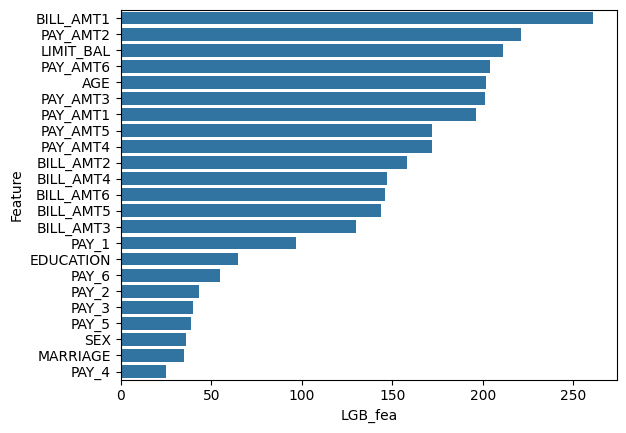

In [70]:
sns.barplot(x="LGB_fea", y="Feature", data=LGB_IMP)

In [71]:
AB_Fea_IMP = feature_importance.sort_values(by="AB_fea", ascending=False)

<Axes: xlabel='AB_fea', ylabel='Feature'>

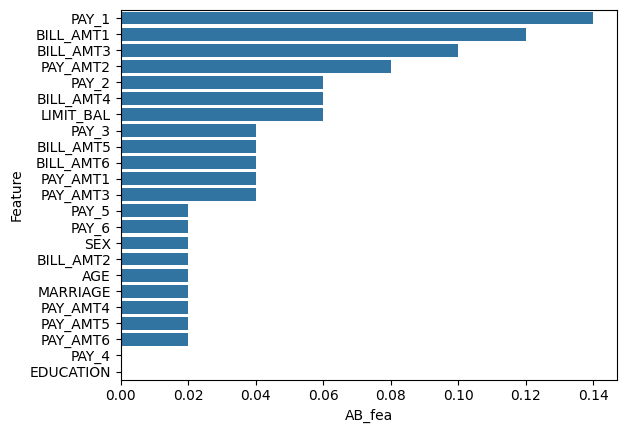

In [73]:
sns.barplot(x="AB_fea", y="Feature", data=AB_Fea_IMP)